In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

2024-05-13 08:44:06.176828: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 08:44:06.176955: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 08:44:06.266012: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
from numpy import array
import pandas as pd
import cv2
from glob import glob
import PIL
import time
from tqdm import tqdm
import os

2024-05-13 06:39:10.216599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 06:39:10.216694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 06:39:10.387536: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
image_path = "/kaggle/input/chestray/images/images_normalized/"
images = glob(image_path + "*.png")
len(images)

7470

In [5]:
import re
# Read in the projections data
projections = pd.read_csv('/kaggle/input/chestray/indiana_projections.csv')

# Read in the reports data
reports = pd.read_csv('/kaggle/input/chestray/indiana_reports.csv')

# Define the path to the images folder
images_folder = '/kaggle/input/chestray/images/images_normalized'

# Merge the projections and reports data on the UID column
reports = pd.merge(projections, reports, on='uid')

# Create a dictionary of image filenames and their corresponding captions
data = {}
for i in range(len(reports)):
    filename = reports.loc[i, 'filename']
    caption = reports.loc[i, 'Problems']
    if filename not in data:
        data[filename] = []
    if isinstance(caption, str) and re.match(r'^\d+\.', caption):
        data[filename].append(caption.split('. ')[1])
    else:
        if data[filename]:
            data[filename][-1] += " " + caption
        else:
            data[filename].append(caption)

In [7]:
image_path = "/kaggle/input/chestray/images/images_normalized/"
images = glob(image_path + "*.png")
len(images)

7470

In [8]:
def cleanse_data(data):
    dict_2 = dict()
    for key, value in data.items():
        for i in range(len(value)):
            lines = ""
            line1 = value[i]
            if isinstance(line1, str):
                for j in line1.split():
                    if len(j) < 2:
                        continue
                    j = j.lower()
                    lines += j + " "
                if key not in dict_2:
                    dict_2[key] = list()
                dict_2[key].append(lines)
    return dict_2

data2 = cleanse_data(data)
print(len(data2))

7466


In [9]:
def vocabulary(data2):
    all_desc = set()
    for key in data2.keys():
        [all_desc.update(d.split()) for d in data2[key]]
    return all_desc

# summarize vocabulary
vocabulary_data = vocabulary(data2)
print(len(vocabulary_data))

1719


In [10]:
def save_dict(data2, filename):
    lines = list()
    for key, value in data2.items():
        for desc in value:
            lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

save_dict(data2, 'captions1.csv')

In [2]:
image_directory = '/kaggle/input/chestray/images/images_normalized'

In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/onehotwords/one_hot_encoded_keywords.csv')    

In [4]:
df = df.iloc[:7000]

In [ ]:
print("Range of indices:", df.index[0], "-", df.index[-1])

In [13]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tqdm import tqdm



image_directory = '/kaggle/input/chestray/images/images_normalized'
image_files = [f for f in os.listdir(image_directory) if f.endswith('.png')]

X_dataset = []
for file_name in tqdm(image_files):
    file_path = os.path.join(image_directory, file_name)
    img = image.load_img(file_path, target_size=(SIZE, SIZE, 3))
    img = image.img_to_array(img)
    img = img / 255.0
    X_dataset.append(img)

X = np.array(X_dataset)


100%|██████████| 7470/7470 [07:59<00:00, 15.57it/s]


In [5]:
import numpy as np


#np.save('x.npy', X)
arr_x_loaded = np.load('/kaggle/working/x.npy')
print(arr_x_loaded)

[[[[0.7254902  0.7254902  0.7254902 ]
   [0.7294118  0.7294118  0.7294118 ]
   [0.7254902  0.7254902  0.7254902 ]
   ...
   [0.05490196 0.05490196 0.05490196]
   [0.05882353 0.05882353 0.05882353]
   [0.05882353 0.05882353 0.05882353]]

  [[0.7411765  0.7411765  0.7411765 ]
   [0.73333335 0.73333335 0.73333335]
   [0.7254902  0.7254902  0.7254902 ]
   ...
   [0.05490196 0.05490196 0.05490196]
   [0.05882353 0.05882353 0.05882353]
   [0.05882353 0.05882353 0.05882353]]

  [[0.7647059  0.7647059  0.7647059 ]
   [0.7607843  0.7607843  0.7607843 ]
   [0.7607843  0.7607843  0.7607843 ]
   ...
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]]

  ...

  [[0.6901961  0.6901961  0.6901961 ]
   [0.67058825 0.67058825 0.67058825]
   [0.6745098  0.6745098  0.6745098 ]
   ...
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]
   [0.05490196 0.05490196 0.05490196]]

  [[0.69411767 0.69411767 0.69411767]
   [0.6

In [ ]:
#print(df['ID'][500])

In [6]:
y = np.array(df.drop(['ID'], axis=1))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(arr_x_loaded[:7000], y, random_state=20, test_size=0.3)

In [9]:
SIZE = 200
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()

# Start with smaller filters and increase depth
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Flatten and denser network
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1430, activation='sigmoid'))  # Assuming 1430 classes


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
#model.summary()

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.3291 - loss: 0.0058 - val_accuracy: 0.2886 - val_loss: 0.0055
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.3547 - loss: 0.0057 - val_accuracy: 0.3305 - val_loss: 0.0066
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.3431 - loss: 0.0056 - val_accuracy: 0.0338 - val_loss: 0.0086
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.3586 - loss: 0.0054 - val_accuracy: 0.0362 - val_loss: 0.0077
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.3341 - loss: 0.0055 - val_accuracy: 0.3733 - val_loss: 0.0057
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.3505 - loss: 0.0056 - val_accuracy: 0.0314 - val_loss: 0.0122
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.3103 - loss: 0.0060 - val_accuracy: 0.3676 - val_loss: 0.0090
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.3541 - loss: 0.0057 - val_accuracy:

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Re-compile the model with a new learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Setup early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64, callbacks=[early_stopping])


Epoch 1/50
 1/77 ━━━━━━━━━━━━━━━━━━━━ 13:10 10s/step - accuracy: 0.3281 - loss: 0.0050

W0000 00:00:1715590503.305089    2250 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.3444 - loss: 0.0056

W0000 00:00:1715590517.401701    2249 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715590520.385768    2250 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


77/77 ━━━━━━━━━━━━━━━━━━━━ 29s 241ms/step - accuracy: 0.3443 - loss: 0.0056 - val_accuracy: 0.3738 - val_loss: 0.0061
Epoch 2/50


W0000 00:00:1715590521.587105    2251 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.3633 - loss: 0.0055 - val_accuracy: 0.3743 - val_loss: 0.0054
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.3483 - loss: 0.0055 - val_accuracy: 0.3733 - val_loss: 0.0056
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.3414 - loss: 0.0055 - val_accuracy: 0.3633 - val_loss: 0.0088
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.3486 - loss: 0.0055 - val_accuracy: 0.3738 - val_loss: 0.0062
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.3340 - loss: 0.0057 - val_accuracy: 0.3743 - val_loss: 0.0051
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.3441 - loss: 0.0056 - val_accuracy: 0.3743 - val_loss: 0.0052
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.3477 - loss: 0.0054 - val_accuracy: 0.3743 - val_loss: 0.0054
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.3416 - loss: 0.0054 - val_accuracy: 0.3743 - val_loss: 0.

In [26]:
model.save('model3.h5')

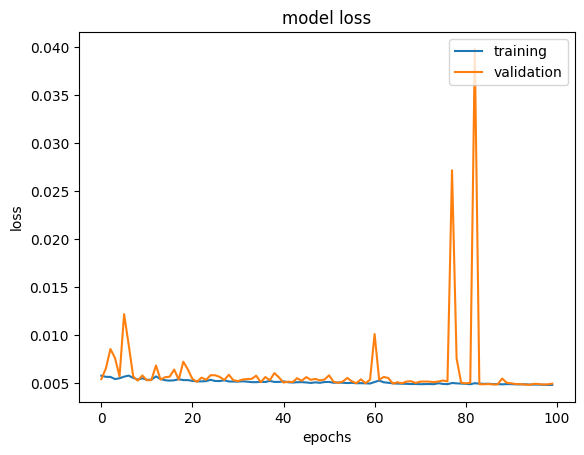

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

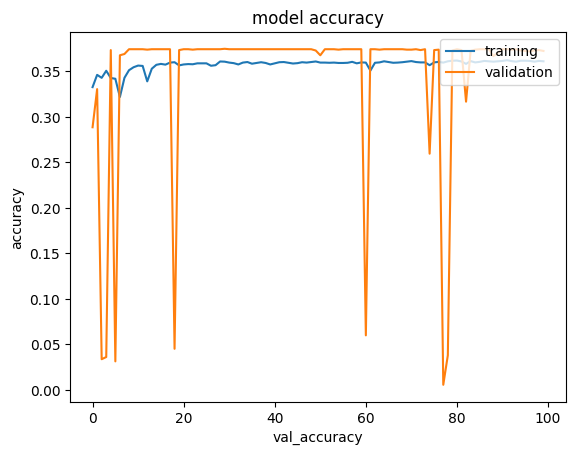

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()